# Week 3 Day 1

For this example of using Colab, I use a powerful GPU box to generate a cool image!

## Important note

This first example needs an A100 box to run, as it uses the groundbreaking FLUX-1 model. That may cost a couple of dollars to run, so I'm saving the results here so you can see the output without needing to use an A100. But if you don't mind the spend then it's a lot of fun!

You can also substitute in a cheaper model if you'd prefer, and I've given an example at the bottom of this colab that runs on a free T4.  
To try out the free image generation

## One more note

You will get an angry error from pip when you run the next cell, complaining about an incompatible version of fsspec. Ignore the error - we need that version!

In [1]:
# Disregard the error that pip gives you when you run this - all should be well!

!pip install -q diffusers transformers accelerate bitsandbytes datasets fsspec==2023.9.2

# Important Note

I didn't mention this in the lecture, but you may need to log in to the HuggingFace hub if you've not done so before.

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then Create a new API token, giving yourself write permissions.  

**IMPORTANT** when you create your HuggingFace API key, please be sure to select read/write permissions for your key by clicking on the WRITE tab, otherwise you may get problems later.

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
  In the name field put `HF_TOKEN`  
  In the value field put your actual token: `hf_...`  
  Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab. There's also a shortcut to simply overwrite the line below with:  
`hf_token = "hf_...."`  
But this isn't a best practice, as you'd have to be careful not to share the colab. And one of the great things about colabs is that you can share them!

In [4]:
from huggingface_hub import login
from dotenv import load_dotenv
import os

load_dotenv()

hf_token = os.getenv("HUGGINGFACE_API_KEY")
if hf_token is None:
    raise ValueError("HUGGINGFACE_API_KEY not found in environment variables.")
else:
    print("HUGGINGFACE_API_KEY found in environment variables.")
login(hf_token, add_to_git_credential=True)

HUGGINGFACE_API_KEY found in environment variables.


## This next cell will only work on a powerful GPU box like an A100

But at the bottom of the colab is an example that will run on a free T4!

(The purpose of this colab is to show off how you can connect to different GPUs and what they are capable of, rather than the specifics of image generation.)

In [6]:
import torch
from diffusers import FluxPipeline

device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
if device == "cpu":
    raise RuntimeError("This example requires a GPU. Please run on a machine with a GPU.")

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16).to(device)
generator = torch.Generator(device=device).manual_seed(0)
prompt = "A futuristic class full of students learning AI coding in the surreal style of Salvador Dali"

# Generate the image using the GPU
image = pipe(
    prompt,
    guidance_scale=0.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=generator
).images[0]

image.save("surreal.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

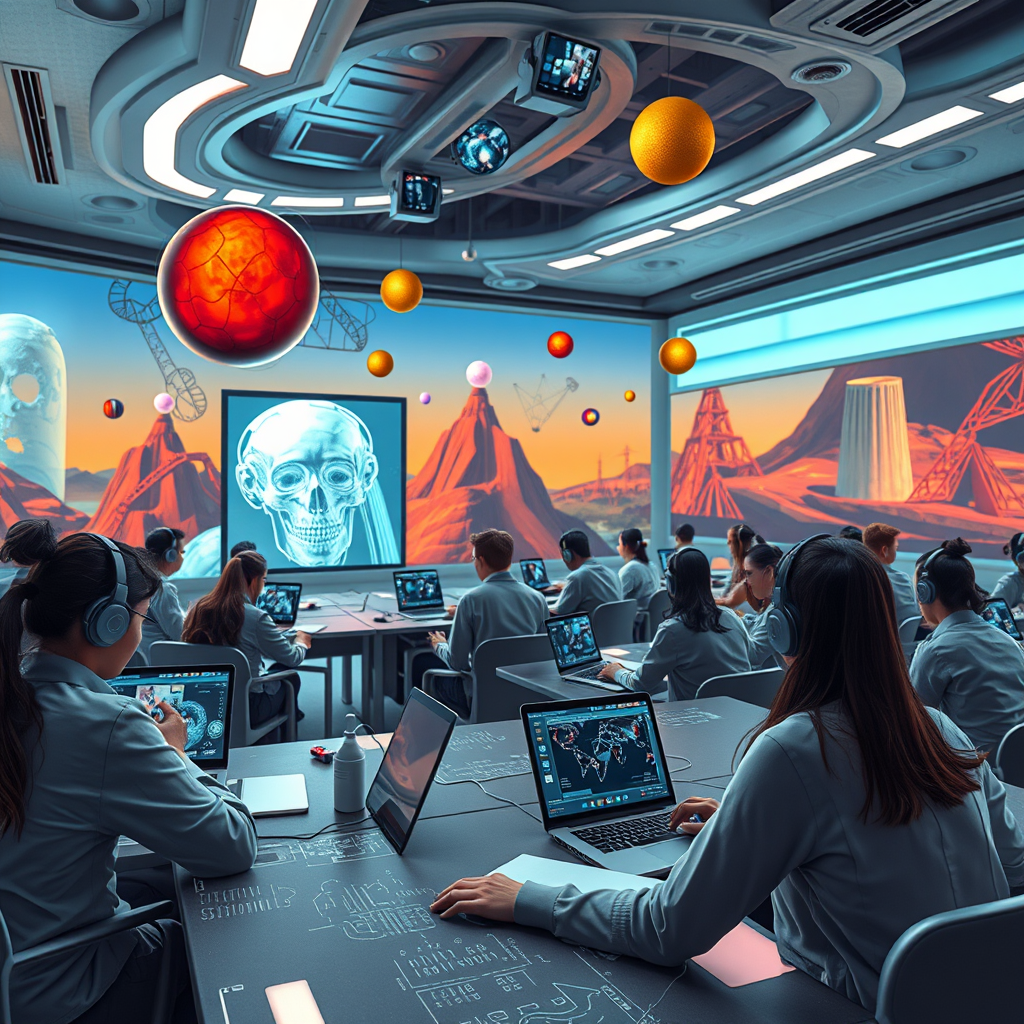

In [7]:
from IPython.display import display
from PIL import Image

# Display the image inline
display(image)

In [8]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("matthijs/cmu-arctic-xvectors", split="validation")

speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hi to an artificial intelligence engineer on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
cannot import name 'VIDEO_PROCESSOR_NAME' from 'transformers.utils' (/opt/homebrew/Caskroom/miniforge/base/envs/llms/lib/python3.11/site-packages/transformers/utils/__init__.py)

In [ ]:
from IPython.display import Audio

# Play the generated audio
Audio("speech.wav")

# To run image generation on a free T4 box

Please run the code below. The results are not as impressive as the Flux model, but it runs quickly..



In [ ]:
!pip install -q diffusers

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "A futuristic class full of students learning AI coding in a surreal style"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/1 [00:00<?, ?it/s]

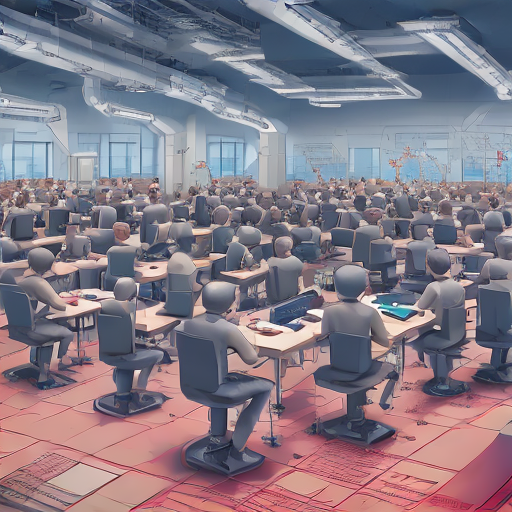

In [ ]:
from IPython.display import display
from PIL import Image

# Display the image inline
display(image)